<a href="https://colab.research.google.com/github/rodriquiel/Clasificacion_con_SKLearn/blob/main/Clasificacion_con_SKLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trabajo a realizar: mostrar el funcionamiento de algoritmos de clasificacion en base a distintos procesos
* Features
* Muestras
* Entrenamiento 
* Prueba
* Medicion tasa de acierto
* Optimizacion proceso
* Prever

##Herramientas utilizadas: 
* Python
* SciKit Learn
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Graphviz

##Introduccion a la clasificacion

###Objetivo: identificar si un animal es un perro o un gato

###Features
1 = Si y 0 = No

* Tiene el pelo largo?
* Tiene las uñas afiladas?
* Hace miau?

In [ ]:
perro1 = [0,1,1]
perro2 = [1,0,1]
perro3 = [1,1,1]

gato1 = [0,1,0]
gato2 = [0,1,1]
gato3 = [1,1,0]

X_train = [perro1, perro2, perro3, gato1, gato2, gato3] #datos
y_train = [1, 1, 1, 0, 0, 0] #clases

Importacion de estimador LinearSVC (support vector classifier)

In [ ]:
from sklearn.svm import LinearSVC

Instanciado del modelo y pasaje de datos para entrenarlo

In [ ]:
model = LinearSVC()
model.fit(X_train,y_train)

LinearSVC()

Prueba del modelo de identificacion de animal con un animal misterioso el cual se conocen sus features

In [ ]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

El modelo estimó que se trataba de un perro (1)

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

X_test = [misterio1, misterio2, misterio3]
y_test = [0,1,1]

En este case, se conoce la clasificacion de los animales (gato, perro, perro) y se pone a prueba el modelo predictivo

In [ ]:
model.predict(X_test)

array([1, 0, 1])

El modelo solo acerto 1 de las tres entradas

Calculo de tasa de acierto

In [ ]:
previsiones = model.predict(X_test)
correctos = (previsiones == y_test).sum()
total = len(X_test)
tasa_acierto = correctos/total
print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

La tasa de acierto fue de: 33.33 %


Otra manera mas simple de calcular tasas de acierto

In [ ]:
from sklearn.metrics import accuracy_score

tasa_acierto2 = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_acierto2*100,2)} %')

La tasa de acierto fue de: 33.33 %


##Clasificacion y manipulacion de datos

###Ahora, se usará una base de datos a partir de datos recopilados de un e-commerce sobre visitas a sus distintas paginas de diferentes usuarios, y se buscara saber en que casos los usuarios que ingresaron compraron algun producto

In [ ]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'

datos = pd.read_csv(uri)

In [ ]:
datos.sample(5)

,home,how_it_works,contact,bought
17,0,1,0,0
27,1,0,1,1
84,1,0,1,1
78,0,0,1,0
46,1,0,1,1


In [ ]:
dic_col = {
    'home':'principal',
    'how_it_works':'como_funciona',
    'contact':'contacto',
    'bought':'compro'
}

In [ ]:
datos = datos.rename(columns = dic_col)

In [ ]:
datos.sample(10)

,principal,como_funciona,contacto,compro
72,0,0,1,0
48,1,1,0,0
69,1,1,0,0
86,1,1,0,0
74,0,0,1,0
46,1,0,1,1
13,0,0,1,0
12,0,0,1,0
73,0,0,1,0
80,0,0,1,0


In [ ]:
X = datos[['principal','como_funciona','contacto']]
X.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [ ]:
y = datos.compro
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [ ]:
datos.shape

(99, 4)

Ahora se segmentan los datos para prueba y los datos para entrenamiento

Se entrena con 75 elementos y se prueba con 24 elementos

In [ ]:
X_train = X[:75]
y_train = y[:75]

X_test = X[75:]
y_test = y[75:]

Importacion de bibliotecas

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

Calculo de previsiones y tasa de acierto

In [ ]:
model = LinearSVC()
model.fit(X_train,y_train)
previsiones = model.predict(X_test)
tasa_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

La tasa de acierto fue de: 95.83 %


No puede afirmarse que el modelo sea bueno o malo ya que no se tiene con que compararlo

Otra manera mas simple de separar los datos para test y para train

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42 #Para establecer estado de aleatoreidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify = y)

model = LinearSVC()
model.fit(X_train,y_train)
previsiones = model.predict(X_test)
tasa_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

La tasa de acierto fue de: 96.0 %


##Proyecto de baja dimensionalidad y Baseline

###Ahora, se usará una base de datos a partir de datos recopilados a partir de proyectos de web desing, donde se tiene la condicion de no-finalizacion (1: no finalizado, 0: finalizado), las horas esperadas de trabajo y el precio cobrado

In [ ]:
uri_2 = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

datos_2 = pd.read_csv(uri_2)

In [ ]:
dic_col = {
    'unfinished': 'no_finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'precio'
}

In [ ]:
datos_2 = datos_2.rename(columns = dic_col)

In [ ]:
datos_2.sample(5)

,no_finalizado,horas_esperadas,precio
1431,0,100,28398
1565,0,44,717
1567,1,41,485
1845,0,14,246
462,1,62,380


Se decide cambiar la logica de la columna 'no_finalizado' para que sea mas intuitiva (1: finalizado, 0: no finalizado)

In [ ]:
cambio = {
    1:0,
    0:1
}

In [ ]:
datos_2['finalizado'] = datos_2.no_finalizado.map(cambio)

In [ ]:
datos_2.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
884,1,2,112,0
416,1,41,251,0
768,1,66,2428,0
1078,0,75,7090,1
1263,1,62,2837,0


###Grafico de dispersion del precio en base a las horas esperadas, teniendo en cuenta la condicion de finalizacion

In [ ]:
import seaborn as sns

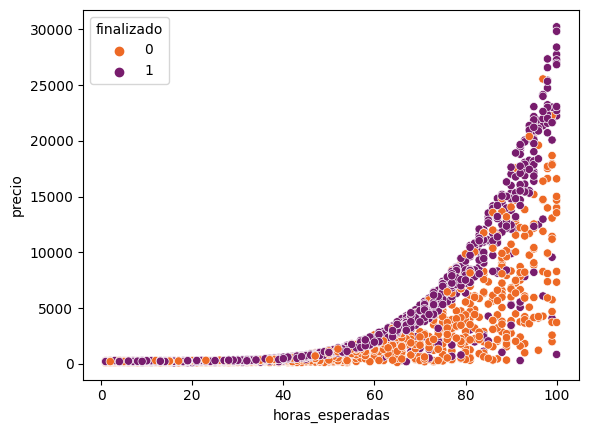

In [ ]:
sns.scatterplot(data = datos_2, x = 'horas_esperadas', y = 'precio', hue = 'finalizado', palette = 'inferno_r');

Se puede observar que a medida que la cantidad de horas de trabajo esperadas aumentan, si el precio aumenta tambien los proyectos son finalizados, mientras que si el precio se mantiene en un valor bajo, los proyectos no son finalizados

###Se puede ver mejor la relacion descripta en el siguiente grafico 

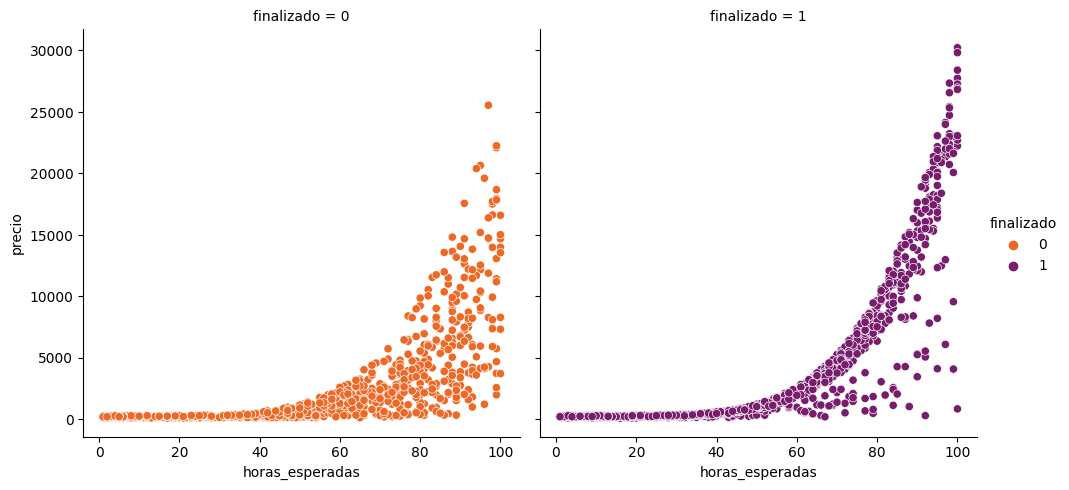

In [ ]:
sns.relplot(data = datos_2, x = 'horas_esperadas', y = 'precio', hue = 'finalizado', col = 'finalizado',  palette = 'inferno_r');

###Desarrollo e implementacion del modelo para determinar si el proyecto será finalizado o no

In [ ]:
import numpy as np


X = datos_2[['horas_esperadas','precio']]
y = datos_2.finalizado

SEED = 42 
np.random.seed(SEED) #Para establecer estado de aleatoreidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)

print(f'Se entrenó al modelo con {len(X_train)} elementos y se utilizan de prueba {len(X_test)} elementos')

model = LinearSVC()
model.fit(X_train,y_train)
previsiones = model.predict(X_test)
tasa_acierto = accuracy_score(y_test, previsiones)

print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

Se entrenó al modelo con 1617 elementos y se utilizan de prueba 540 elementos
La tasa de acierto fue de: 57.59 %


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###Se establece una Baseline para saber si el modelo es bueno

In [ ]:
base_previsiones = np.ones(540)
tasa_acierto = accuracy_score(y_test, base_previsiones)

print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

La tasa de acierto fue de: 52.59 %


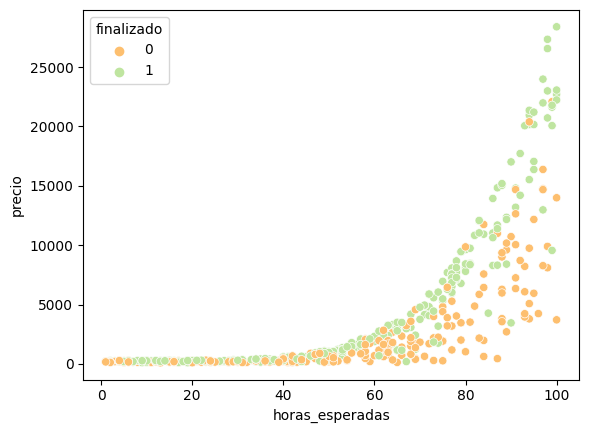

In [ ]:
sns.scatterplot(data = X_test, x = 'horas_esperadas', y = 'precio', hue = y_test, palette = 'Spectral');

In [ ]:
x_min = X_test.horas_esperadas.min()
x_max = X_test.horas_esperadas.max()
y_min = X_test.precio.min()
y_max = X_test.precio.max()

In [ ]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [ ]:
xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [ ]:
Z = model.predict(puntos)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [ ]:
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

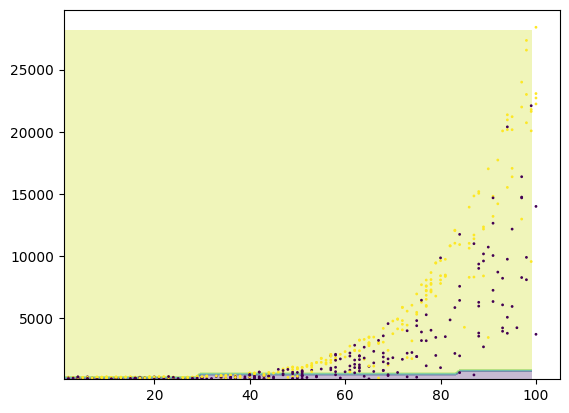

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(X_test.horas_esperadas, X_test.precio, c=y_test, s=1);

La recta verde representa el limite de la decision (decision boundary), y para este caso su interpretacion es que todo los puntos que se encuentran sobre ella seran tomados como finalizados y todos los que estan por debajo seran tomados como no finalizados. Observando donde se encuentran los puntos correspondientes a no finalizado y finalizado se puede concluir que el limite es pesimo para el caso

Se pueden realizar ciertas operaciones para mejorar estos resultados, las cuales seran detalladas a continuacion debajo

##Suport vector machines y sistemas no lineales

Se debe estandarizar los datos para que tengan la misma cantidad de ceros con la finalidad de que el SVC pueda estimar y graficar de buena manera

Se entrenó al modelo con 1617 elementos y se utilizan de prueba 540 elementos
La tasa de acierto fue de: 67.78 %


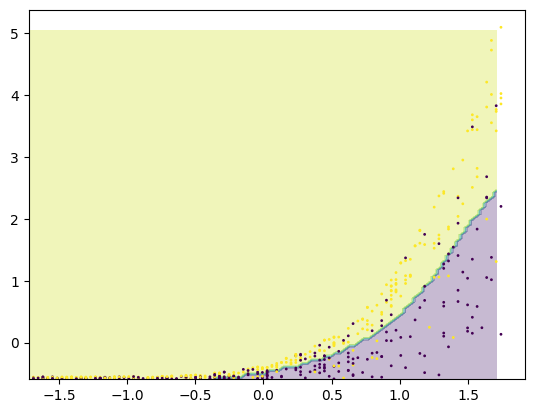

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = datos_2[['horas_esperadas','precio']]
y = datos_2.finalizado

SEED = 42 
np.random.seed(SEED) #Para establecer estado de aleatoreidad

raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
print(f'Se entrenó al modelo con {len(raw_X_train)} elementos y se utilizan de prueba {len(raw_X_test)} elementos')

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC()
model.fit(X_train,y_train)
previsiones = model.predict(X_test)

data_X = X_test[:,0]
data_y = X_test[:,1]

x_min = data_X.min()
x_max = data_X.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

xx, yy = np.meshgrid(eje_x, eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos

Z = model.predict(puntos)
Z = Z.reshape(xx.shape)
Z

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_X, data_y, c=y_test, s=1);

tasa_acierto = accuracy_score(y_test, previsiones)

print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

Se puede observar en este caso que utilizando un estimador no lineal para el calculo del limite de la decision (recta verde) se llegó a un mejor resultado que en el caso anterior, quedando los puntos en su mayoria con su respectivo color de decision tomada por el modelo desarrollado para saber que proyectos seran finalizados y cuales no

##Dummy classifiers y Arboles de decision

###Para este caso, se utilizará una base de datos sobre datos de automoviles como su millaje por año, el año del modelo, el precio y si fue vendido. Se busca crear un modelo para estimar si un automovil con ciertos atributos será vendido o no

In [ ]:
uri_3 = 'https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

datos_3 = pd.read_csv(uri_3)

In [ ]:
datos_3.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Tratamiento de los datos proporcionados por la base

In [ ]:
dic_col = {
    'mileage_per_year': 'millas_por_anho',
    'model_year': 'anho_del_modelo',
    'price': 'precio',
    'sold': 'vendido'
}

In [ ]:
datos_3 = datos_3.rename(columns = dic_col)
datos_3.sample(5)

,Unnamed: 0,millas_por_anho,anho_del_modelo,precio,vendido
9080,9080,17381,2001,26828.58,yes
6299,6299,17854,2013,89151.50,no
3898,3898,10698,2004,71802.74,yes
5931,5931,15277,2000,28873.83,yes
660,660,14776,2003,79290.13,yes


In [ ]:
cambio = {
    'no':0,
    'yes':1
}

In [ ]:
datos_3.vendido = datos_3.vendido.map(cambio)
datos_3.sample(5)

,Unnamed: 0,millas_por_anho,anho_del_modelo,precio,vendido
8946,8946,9475,2001,68173.85,0
9235,9235,12133,1998,36905.68,1
9552,9552,14696,2003,23620.63,1
920,920,5888,2007,95932.04,0
6094,6094,5547,2009,51312.72,1


En base al año del modelo, resulta mas util a los fines practicos tener la 'edad' del modelo que su año de fabricacion, por lo que se realiza ese cambio

In [ ]:
from datetime import datetime

anho_actual = datetime.today().year
datos_3['edad_del_modelo'] = anho_actual - datos_3.anho_del_modelo

datos_3.sample(5)

,Unnamed: 0,millas_por_anho,anho_del_modelo,precio,vendido,edad_del_modelo
3482,3482,13153,2013,44497.20,0,10
4343,4343,9774,2005,93236.69,0,18
818,818,16436,2013,101415.11,1,10
6839,6839,6661,1998,22724.99,1,25
4798,4798,10466,1998,76841.74,0,25


Para este caso, en Latinoamerica se utilizan los kilometros y no las millas como unidad de medida, por lo que se procede a realizar la conversion

In [ ]:
datos_3['km_por_anho'] = datos_3.millas_por_anho * 1.60934
datos_3.sample(5)

,Unnamed: 0,millas_por_anho,anho_del_modelo,precio,vendido,edad_del_modelo,km_por_anho
8902,8902,10889,1998,73184.40,0,25,17524.10326
6114,6114,6785,2002,20991.94,1,21,10919.37190
707,707,8283,2000,39044.74,1,23,13330.16322
3335,3335,16069,2000,49760.83,1,23,25860.48446
8868,8868,16605,1999,34290.76,1,24,26723.09070


In [ ]:
datos_3 = datos_3.drop(columns = ['Unnamed: 0', 'millas_por_anho', 'anho_del_modelo'], axis = 1)
datos_3.sample(5)

,precio,vendido,edad_del_modelo,km_por_anho
6683,31411.19,1,20,14764.08516
5963,66775.54,0,25,20087.78188
1756,51973.42,1,24,24532.77896
4268,101495.55,1,25,37980.42400
6660,35132.04,1,17,16101.44670


###Desarrollo e implementacion del modelo del modelo

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = datos_3[['edad_del_modelo','km_por_anho','precio']]
y = datos_3.vendido

SEED = 42 
np.random.seed(SEED) #Para establecer estado de aleatoreidad

raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
print(f'Se entrenó al modelo con {len(raw_X_train)} elementos y se utilizan de prueba {len(raw_X_test)} elementos')

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC()
model.fit(X_train,y_train)
previsiones = model.predict(X_test)

tasa_acierto = accuracy_score(y_test, previsiones)

print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

Se entrenó al modelo con 7500 elementos y se utilizan de prueba 2500 elementos
La tasa de acierto fue de: 76.04 %


Se puede pensar que un 76% es un buen valor de tasa de acierto, pero se debe establecer una baseline para hacer un correcto analisis y obtener una conclusion

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(X_train, y_train)
exactitud = dummy.score(X_test, y_test) * 100

print(f'La exactitud del clasificador Dummy stratified fue {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue 52.64%


In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
exactitud = dummy.score(X_test, y_test) * 100

print(f'La exactitud del clasificador Dummy most_frequent fue {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue 58.0%


Al ver los resultados de las baselines en base a los calsificadores Dummy utilizados se puede concluir que dependiendo del tipo de estrategia al momento de instanciar nuestro DummyClassifier, se tiene una baseline mejor o peor.

cuando se selecciona una baseline la idea es quedarse con una baseline que tenga sentido, entonces most_frequent, que tiene un valor más alto seria la adecuada, y este es el valor del clasificador (58%) se debe superar de buena manera. En este caso, se superó en aproximadamente 18%. Entonces se puede concluir que hubo una superación bastante grande y que el modelo es bueno.

La contra con la que cuenta este tipo de clasificador es que no tiene ningun grafico para detallar de manera visual lo calculado

###Aplicacion de otro tipo de clasificador (Arbol de decision)

Modelo con datos escalados

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = datos_3[['edad_del_modelo','km_por_anho','precio']]
y = datos_3.vendido

SEED = 42 
np.random.seed(SEED) #Para establecer estado de aleatoreidad

raw_X_train, raw_X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
print(f'Se entrenó al modelo con {len(raw_X_train)} elementos y se utilizan de prueba {len(raw_X_test)} elementos')

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train,y_train)
previsiones = model.predict(X_test)

tasa_acierto = accuracy_score(y_test, previsiones)

print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

Se entrenó al modelo con 7500 elementos y se utilizan de prueba 2500 elementos
La tasa de acierto fue de: 78.04 %


###Vista del arbol en forma de grafo con graphviz

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = X.columns
dot_data = export_graphviz(model, feature_names = features)
grafico = graphviz.Source(dot_data)

Arbol de decision con datos escalados

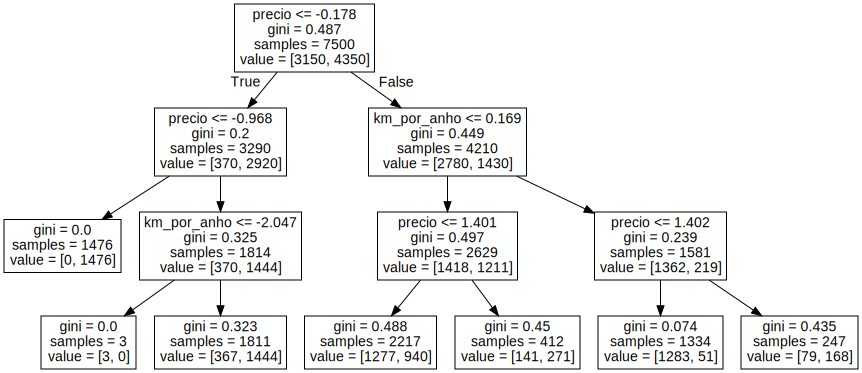

In [ ]:
grafico

Ahora se realiza el modelo pero con datos sin escalar o estandarizar

In [ ]:
X = datos_3[['edad_del_modelo','km_por_anho','precio']]
y = datos_3.vendido

SEED = 42 
np.random.seed(SEED) #Para establecer estado de aleatoreidad

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
print(f'Se entrenó al modelo con {len(X_train)} elementos y se utilizan de prueba {len(X_test)} elementos')

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train,y_train)
previsiones = model.predict(X_test)

tasa_acierto = accuracy_score(y_test, previsiones)

print(f'La tasa de acierto fue de: {round(tasa_acierto*100,2)} %')

Se entrenó al modelo con 7500 elementos y se utilizan de prueba 2500 elementos
La tasa de acierto fue de: 78.04 %


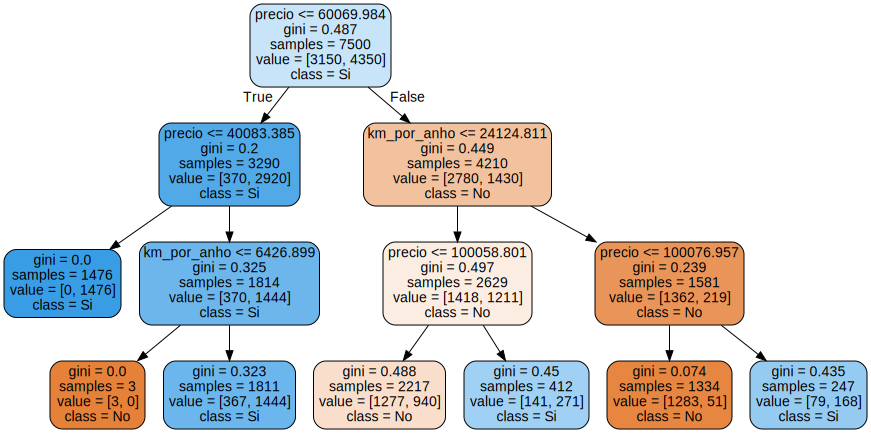

In [ ]:
features = X.columns
dot_data = export_graphviz(model, feature_names = features, filled = True, rounded = True, class_names = ['No','Si'])
grafico = graphviz.Source(dot_data)
grafico

Class = Si significa que se vende y Class = No significa que no se vende, y a mayor oscuridad del color, mayor probabilidad de que lo resultado en Class suceda

Se puede ver que para este modelo, la 'edad' del auto no cobra relevancia a la hora de devolver un resultado en base a una consulta